In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('books.csv')

In [12]:
#1 Number of rows and columns in books.csv dataset
res = df.shape
print("The number of rows and columns in the dataset:")
print(res)

The number of rows and columns in the dataset:
(399, 24)


In [13]:
#2 Books without an original title 
df['original_title'].isna().sum()

36

In [14]:
#3 counting the unique books in the dataset
df.dropna(subset = ['original_title'],inplace = True)
count = df['book_id'].nunique()
print(count)

363


In [15]:
#4 Average rating of the books
average_rating = df['average_rating'].mean()
print(average_rating)

3.987079889807162


In [16]:
#5 Number of books published in the year 2000
books_published = df[df['original_publication_year'] == 2000]
number_of_books = books_published.shape[0]
print(number_of_books)

7


In [17]:
#6 Books with maximum number of ratings
max_book_ratings = df.loc[df['work_ratings_count'].idxmax()]
max_book_ratings_title = max_book_ratings['title']
print(f"The book with maximum ratings is {max_book_ratings_title}")

The book with maximum ratings is The Diary of a Young Girl


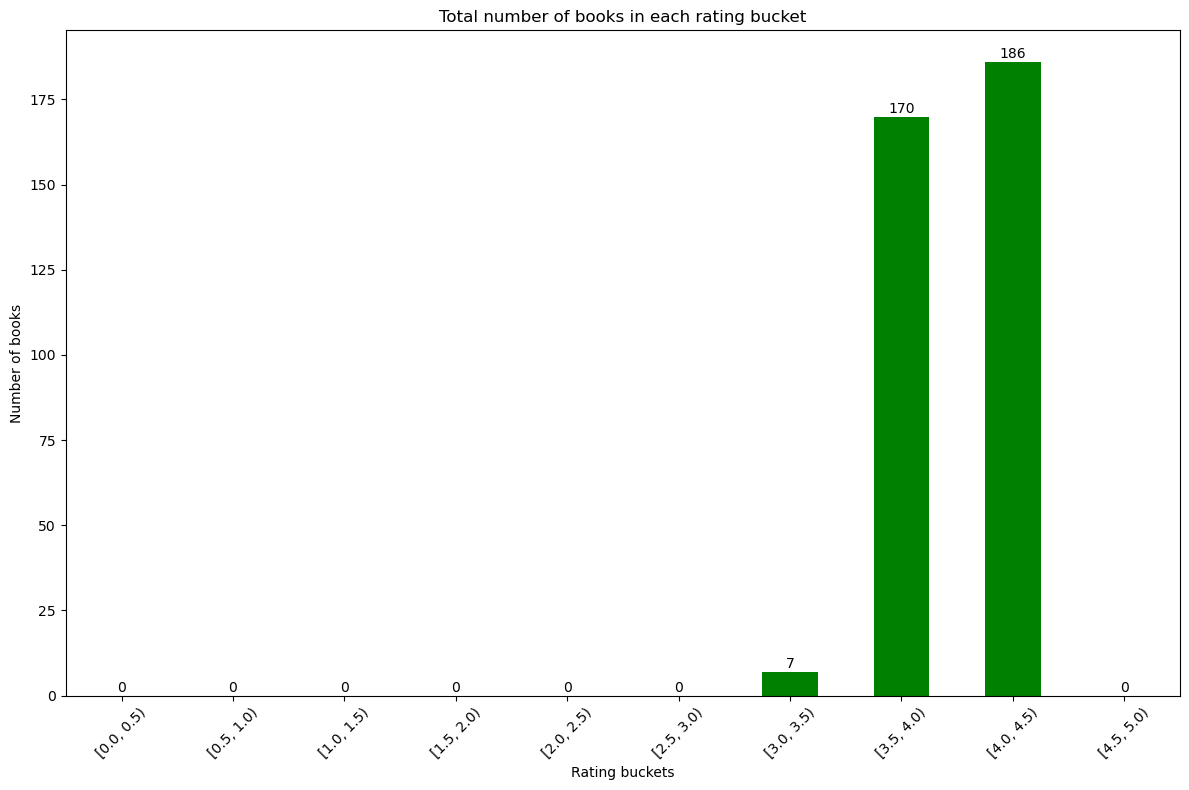

In [18]:
#7 Plotting bar graph to show total number of books in each rating bucket.
bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
df['rating_bucket'] = pd.cut(df['average_rating'], bins, right = False)
books_in_bucket = df.groupby('rating_bucket').size()
plt.figure(figsize = (12,8))
bars = books_in_bucket.plot(kind = 'bar', color = 'green')
plt.title("Total number of books in each rating bucket")
plt.xlabel('Rating buckets')
plt.ylabel('Number of books')
plt.xticks(rotation = 45)
for i, val in enumerate(books_in_bucket):
    plt.text(i, val + 0.2, str(val), ha = 'center', va = 'bottom')
plt.tight_layout()
plt.show()